<a href="https://colab.research.google.com/github/sasireddyvari/IMDB_Sentiment_Analysis/blob/master/IMDB_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [16]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/IMDb_Movie_Review_Sentiment_Analysis_ML/IMDb-Movie-Review-Sentiment-Analysis-ML-main/train/train.csv')

In [4]:
#train = train.sample(frac = 1)

In [5]:
#train = train.head(15000)

In [6]:
train.head()

,label,reviews
0,0,"Universal's answer to ""The Exorcist"" isn't a v..."
1,0,The Tooth Fairy is set in a small town somewhe...
2,1,I saw this movie with my dad. I must have been...
3,0,Bridges of madison county is a better made ver...
4,1,"That is no criticism of the film, but rather a..."


In [7]:
train = train[['reviews', 'label']]
train.head()

,reviews,label
0,"Universal's answer to ""The Exorcist"" isn't a v...",0
1,The Tooth Fairy is set in a small town somewhe...,0
2,I saw this movie with my dad. I must have been...,1
3,Bridges of madison county is a better made ver...,0
4,"That is no criticism of the film, but rather a...",1


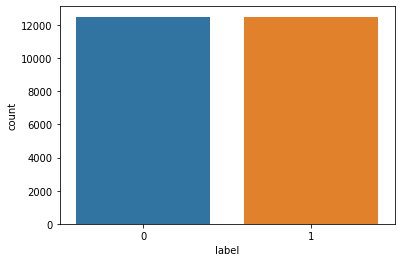

In [8]:
sns.countplot(data=train, x='label')

In [9]:
corpus = []
for i in range(0, len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['reviews'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [10]:
#corpus

In [11]:
pd.Series(corpus).shape

(25000,)

In [12]:
data=pd.concat([train, pd.Series(corpus)], axis=1,ignore_index=True)
data.columns = ['reviews', 'label','corpus']

In [13]:
x=data['corpus']
y=data['label']

In [14]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 500)
# x = cv.fit_transform(corpus).toarray()
# y = train.iloc[:, -1].values

In [17]:
from sklearn.pipeline import Pipeline
imdb_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

In [60]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# cv = TfidfVectorizer()
# X = cv.fit_transform(corpus).toarray()
# y = train.iloc[:, -1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [19]:
imdb_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [20]:
y_pred = imdb_clf.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2143  352]
 [ 325 2180]]


0.8646

In [35]:
# test = ["I don't understand why the notes are so low. It's been months since I've seen a film so powerful, so fine, so right. As much in the subject matter as in the acting. A film about life, real life. Its violence and beauty. To what extent children are the wealth of this world. An ode to life. Poignant."]
# test_vec = cv.transform(test).toarray()
# classifier.predict(test_vec)

array([1])

# Saving Model

In [22]:
import pickle

In [24]:
pkl_filename = "/content/drive/MyDrive/Colab Notebooks/Projects/IMDb_Movie_Review_Sentiment_Analysis_ML/IMDb-Movie-Review-Sentiment-Analysis-ML-main/Imdb_Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(imdb_clf, file)

In [26]:
file = open('/content/drive/MyDrive/Colab Notebooks/Projects/IMDb_Movie_Review_Sentiment_Analysis_ML/IMDb-Movie-Review-Sentiment-Analysis-ML-main/Imdb_Model.pkl', 'rb')
imdb_model = pickle.load(file)
file.close()

In [61]:
text=input("Enter the text:")
final_text=text.lower()
# import re
# rx = re.compile('([\',"".])')
# final_text=rx.sub("",final_text)
final_text=final_text.split('.')
output=imdb_model.predict(final_text)

Enter the text:Movie is very goiod


In [62]:
if output[0] ==0:
  print('Negative Review')
else:
  print('Positive Review')

Negative Review


In [33]:
text=input()

Universal's answer to "The Exorcist" isn't a very good one. Unfortunately, the film offers bland, unimaginative direction from Michael Winner who wastes an outstanding cast 


In [34]:
text.lower()

'universal\'s answer to "the exorcist" isn\'t a very good one. unfortunately, the film offers bland, unimaginative direction from michael winner who wastes an outstanding cast '

'Universals answer to The Exorcist isnt a very good one Unfortunately the film offers bland unimaginative direction from Michael Winner who wastes an outstanding cast '

'Universals answer to The Exorcist isnt a very good one Unfortunately the film offers bland unimaginative direction from Michael Winner who wastes an outstanding cast '